# Iris Flower Classification Project

In [58]:
# {
#   // Autocomplete disabled on 2025-06-17. Remember to re-enable when needed!
#   "editor.acceptSuggestionOnCommitCharacter": false,
#   "editor.suggestOnTriggerCharacters": false,
#   "editor.quickSuggestions": false,
#   "editor.inlineSuggest.enabled": false
# } Just use copilot again to turn it back on
# Blueprint to be followed:
# 1. Import libraries => Will be doing it as we go along
# 2. Load the dataset
# 3. Preprocessing: drop first column

# 4. EDA
    # → Histograms
    # → Pairplot
    # → Covariance matrix

# 5. Train-test split (use sklearn's train_test_split instead)

# 6. Model 1: Logistic Regression
    # → Train
    # → Predict
    # → Accuracy
    # → Confusion matrix

# 7. Model 2 (Optional): Try KNN, SVM

# 8. Summary or comparison

# 9. Conclusion


## Reading the CSV File & Drop Columns

In [59]:
import pandas as pd
df = pd.read_csv('Iris.csv')
df = df.drop(df.columns[0], axis=1)  # Remove the first column
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## EDA(Exploratory Data Analysis)

| **#** | **EDA Tool**          | **What It Does**                                                      | **Why Use It**                                                                   | **Where in Code**                         |
| ----: | --------------------- | --------------------------------------------------------------------- | -------------------------------------------------------------------------------- | ----------------------------------------- |
|     1 | **Histogram**         | Plots distribution (frequency) of a **single feature**                | See shape of data (normal/skewed), detect outliers, understand value spread      | After reading & cleaning data             |
|     2 | **Pair Plot**         | Plots **scatter plots of feature pairs** + distributions on diagonals | Understand relationships between features, class separability, clustering        | After histograms, before train-test split |
|     3 | **Covariance Matrix** | Shows **numerical correlation** between all features                  | Quantify how features vary together; helps detect redundant/independent features | After pair plot or right before modeling  |


### Histograms

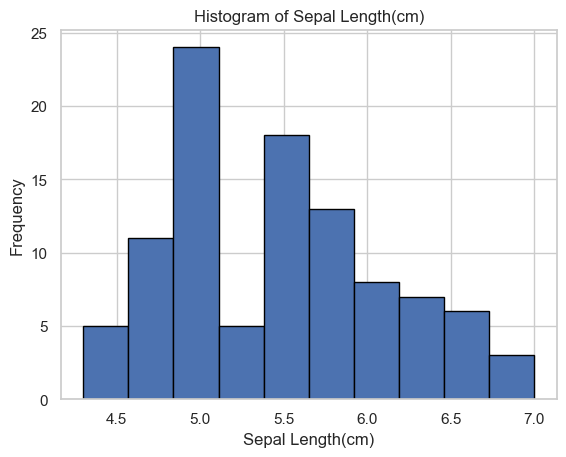

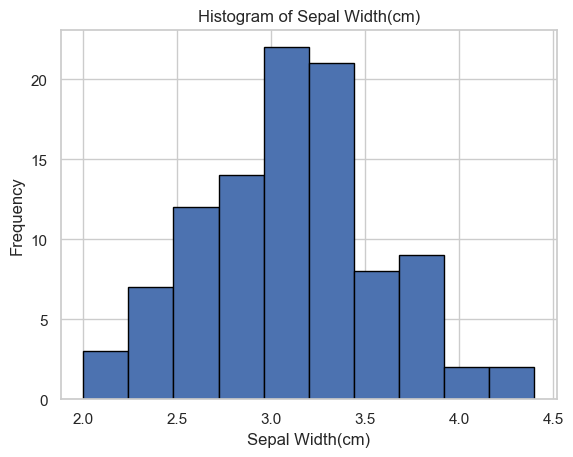

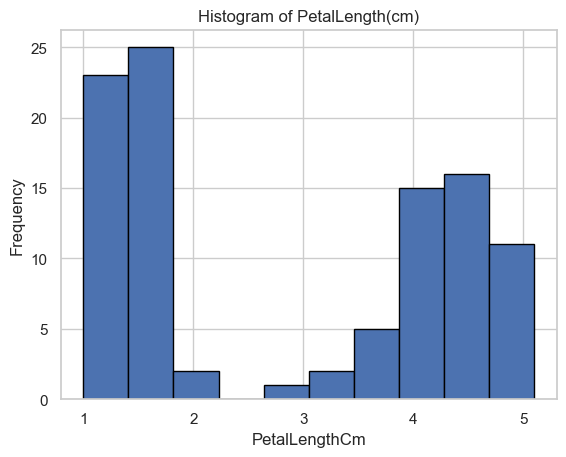

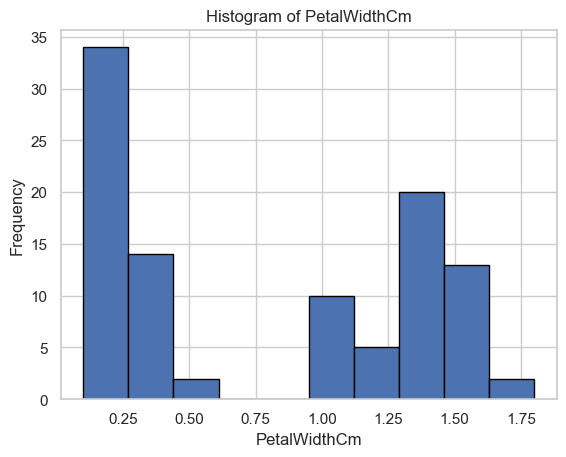

In [60]:
#Purpose of Histograms is to visualize the distribution of each feature in the dataset.
# Do features have similar scales?
# Are they normally distributed?
# Are there any strange spikes, gaps, or outliers?
#Here, they don't seem to have similar scales, SVM and Kmeans cluster would be a inefficient
import matplotlib.pyplot as plt
import seaborn as sns #Library for statistical data visualization

sns.set(style="whitegrid")  # Set the style of seaborn plots

#Only numerical features:
df_features = df.iloc[:,:-1]
df_features.head()
#Now, Histogram of SepalLengthCm
plt.hist(df_features['SepalLengthCm'],bins=10, edgecolor='black')
plt.title('Histogram of Sepal Length(cm)')
plt.xlabel('Sepal Length(cm)')
plt.ylabel('Frequency')
plt.show()
#Now, Histogram of SepalWidthCm
plt.hist(df_features['SepalWidthCm'],bins=10, edgecolor='black')
plt.title('Histogram of Sepal Width(cm)')
plt.xlabel('Sepal Width(cm)')
plt.ylabel('Frequency')
plt.show()
#Now, Histogram of PetalLengthCm
plt.hist(df_features['PetalLengthCm'],bins=10, edgecolor='black')
plt.title('Histogram of PetalLength(cm)')
plt.xlabel('PetalLengthCm')
plt.ylabel('Frequency')
plt.show()
#Now, Histogram of PetalWidthCm
plt.hist(df_features['PetalWidthCm'],bins=10, edgecolor='black')
plt.title('Histogram of PetalWidthCm')
plt.xlabel('PetalWidthCm')
plt.ylabel('Frequency')
plt.show()




### PairPlot

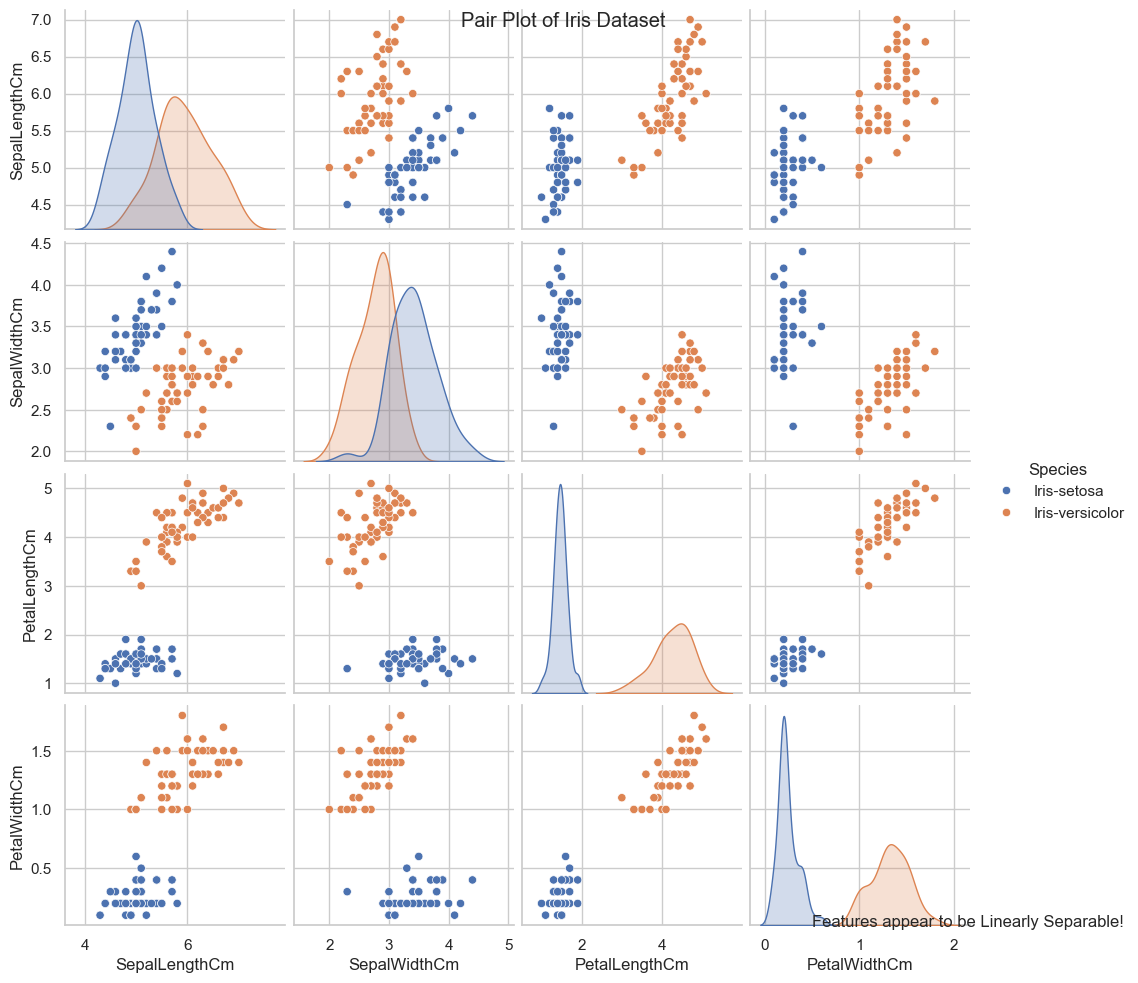

In [61]:
#Purpose: To visualise how every feature pair relates to one another
#Are they separable or not?

#Pair plot: here, we use df and the hue is the last column, species => Label
sns.pairplot(df, hue='Species')
plt.suptitle("Pair Plot of Iris Dataset")
plt.text(0.5,-0.02,"Features appear to be Linearly Separable!")
plt.show()

* Features seem to be Linearly Separable from PairPlot!

### Covariance Matrix

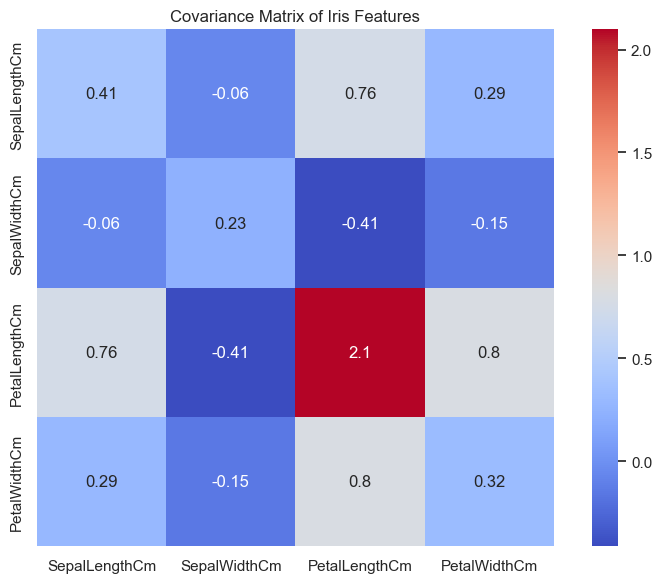

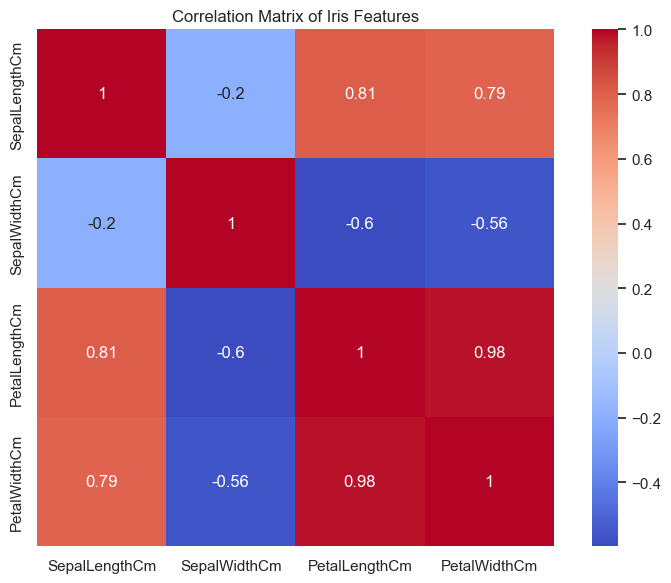

In [62]:
# It is a numerical matrix that shows how two features vary together.
# High positive values mean both features increase together.
# High negative values mean when one increases, the other decreases.
# Values close to zero mean they’re independent
# Unlike pair plots, the covariance matrix gives quantitative correlation between features.
# Will be making covariance matrix with heatmap
import numpy as np
#Dropping label Column:
numerical_df = df.drop('Species',axis=1)

cov_matrix = numerical_df.cov()
#What is a heatmap?
# Let’s say the covariance between PetalLength and PetalWidth is high => low/high numbers from(-∞,+∞)
# In the heatmap:
# That square will be bright red (high positive)
# A strongly negative covariance (e.g. -0.5) will be blue
# A weak covariance (near 0) will be light or neutral color
plt.figure(figsize=(8,6))
sns.heatmap(cov_matrix,annot=True,cmap='coolwarm',square=True)
plt.title("Covariance Matrix of Iris Features")
plt.tight_layout()
plt.show()


#Making Correlation Matrix for Normalised values(Easier to infer)
corr_matrix = numerical_df.corr()
#What is a heatmap?
# Let’s say the covariance between PetalLength and PetalWidth is high => low/high numbers from(-∞,+∞)
# In the heatmap:
# That square will be bright red (high positive)
# A strongly negative covariance (e.g. -0.5) will be blue
# A weak covariance (near 0) will be light or neutral color
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',square=True)
plt.title("Correlation Matrix of Iris Features")
plt.tight_layout()
plt.show()

* Mixture of positive and negative correlations mean Naive Bayes and k-NN work better

## Splitting the data into Train and Test

In [63]:
# Training data: first 40 rows (0–39) and rows 50–89 (50–89)
train_df = pd.concat([df.iloc[0:40], df.iloc[50:90]], ignore_index=True)

# Test data: rows 40–49 (10 rows) and rows 90–119 (30 rows)
test_df = pd.concat([df.iloc[40:50], df.iloc[90:100]], ignore_index=True)


## Model 1: Logistic Regression

In [64]:
from sklearn.linear_model import LogisticRegression

# Separate features and target
X_train = train_df.iloc[:, :-1]  # All columns except the last
y_train = train_df.iloc[:, -1]   # Last column as target

# Create and fit the logistic regression model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Get parameters (theta)
theta = model.coef_
intercept = model.intercept_

### Testing The Dataset

In [65]:
# Separate features and actual labels from test_df
X_test = test_df.iloc[:, :-1]
y_test = test_df.iloc[:, -1]

# Predict labels using the trained model
y_pred = model.predict(X_test)

### Testing Model Accuracy & Confusion Matrix

#### 📊 Confusion Matrix (2-Class: Setosa vs Versicolor)

| Actual ↓ / Predicted → | **Setosa** | **Versicolor** |
|------------------------|------------|----------------|
| **Setosa**             |   ##       |     ##      |
| **Versicolor**         |   ##    |     ##         |

* [0,0] = Setosa predicted as Setosa  
* [1,1] = Versicolor predicted as Versicolor  
* [1,0] = Versicolor predicted as Setosa  
* [0,1] = Setosa predicted as Versicolor



Test Accuracy: 1.00


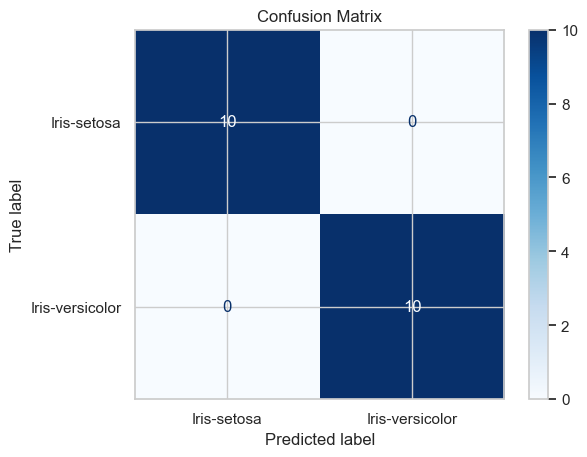

In [66]:
from sklearn.metrics import accuracy_score,confusion_matrix, ConfusionMatrixDisplay

#This is simple, compares if y_test = y_pred?
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.2f}")

#Confusion Matrix, displaying as a heatmap
cm = confusion_matrix(y_test,y_pred,labels=model.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

## Model 2: Naive Bayes

### Bernoulli Naive Bayes (Spam Filter Example)

- Each feature \( x_i \) is binary: either **0** (absent) or **1** (present).
- Example: Does the word "win" appear in the email?
- The model first makes a table with the training data and learns:
  - P(xᵢ = 1 | y=1)
  - P(xᵢ = 0 | y=1)
  - P(xᵢ = 1 | y=0)
  - P(xᵢ = 0 | y=0)
- Final prediction:
P(Spam | X) ∝ P(Spam) × ∏ P(Xi | Spam) => This X is the new e-mail/feature vector and Xi is either 0,1; if the word is there or not

Negative Log Likelihood found with new data X and minimum value found(If NLL for y=1 is lesser, then spam. Otherwise, non-spam.)

---
### Gaussian Naive Bayes (Iris Dataset Example)

- Each feature \( xᵢ \) is a real number (e.g., Sepal Length = 5.1 cm).
- The model assumes:
  Each feature `Xi`, given a class, is assumed to follow a normal (Gaussian) distribution: Xi | Class ~ N(μi, σi²)
  
  Mean (μᵢ) = Average value of feature 
X𝑖 for all samples in that class

  Variance (σᵢ²) = Variance of feature 
X𝑖 for all samples in that class
- Likelihood is computed using the **Gaussian (normal) distribution**:
  $$
  P(x_i \mid \text{Class}) = \frac{1}{\sqrt{2\pi\sigma^2}} \cdot \exp\left(-\frac{(x_i - \mu)^2}{2\sigma^2}\right)
  $$
- Final prediction:
  P(Spam | X) ∝ P(Class) × ∏ P(Xi | Class)

  P(Class) is just calculated from the data set(Class 0 or Class 1)

Best for **continuous features**, like measurements or sensor data.

---

### 🔁 Summary Table

| Use Case             | Feature Type     | Naive Bayes Type | Example                          |
|----------------------|------------------|------------------|----------------------------------|
| Spam Classification  | Binary (0/1)     | Bernoulli        | Word present or absent           |
| Text Classification  | Integer Counts   | Multinomial      | Word frequency                   |
| Iris Classification  | Continuous       | Gaussian         | Sepal/Petal length and width     |

---

> 📌 In Gaussian Naive Bayes, you don’t count how many times a value appears. Instead, you **compute the probability** of a given value using the **Gaussian PDF**.


In [67]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

# # Training data: first 40 rows (0–39) and rows 50–89 (50–89)
# train_df = pd.concat([df.iloc[0:40], df.iloc[50:90]], ignore_index=True)

# # Test data: rows 40–49 (10 rows) and rows 90–119 (30 rows)
# test_df = pd.concat([df.iloc[40:50], df.iloc[90:100]], ignore_index=True)

X_train = train_df.iloc[:,:-1] #Features
y_train = train_df.iloc[:,-1]  #Labels

#Training:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)


,priors,None
,var_smoothing,1e-09


### Testing Model Accuracy & Confusion Matrix

Test Accuracy(Naive Bayes): 1.0
Confusion Matrix:
[[10  0]
 [ 0 10]]


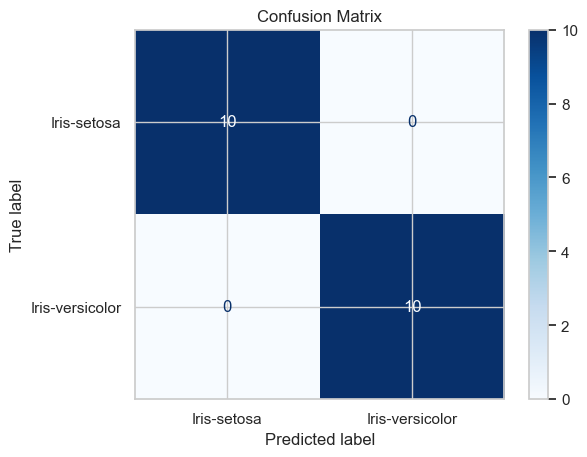

In [69]:
#Predict:
X_testNB = test_df.iloc[:,:-1]
y_testNB = test_df.iloc[:,-1]

y_predNB = nb_model.predict(X_test)
#Now, we have y test and y predict! So we can Evaluate the model!
accuracy = accuracy_score(y_testNB,y_predNB)
conf_matrix = confusion_matrix(y_testNB,y_predNB)

print("Test Accuracy(Naive Bayes):",accuracy)
print("Confusion Matrix:")
print(conf_matrix)
#As a heat map:

#Confusion Matrix, displaying as a heatmap
cm = confusion_matrix(y_testNB,y_predNB,labels=model.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

## Conclusion

In this project, we explored the classic **Iris flower classification** problem using two different models:

- **Logistic Regression**: A linear classifier that provided perfect separation between the classes with 100% accuracy.
- **Gaussian Naive Bayes**: A probabilistic model assuming normally distributed features, also achieving 100% accuracy on our selected test set.

### Takeaways:
- The features (sepal/petal length and width) in the dataset are highly separable, as evident from **pair plots** and the **confusion matrix**.
- Exploratory Data Analysis (EDA) revealed clear patterns in the data through **histograms**, **pair plots**, and a **correlation matrix**.
- Gaussian Naive Bayes models continuous features by fitting a **normal distribution** to each feature per class, a key difference from binary Bernoulli Naive Bayes used in spam filtering.